In [186]:
import pandas as pd 
import numpy as np
import calendar
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load the randomised dataset 
df=pd.read_excel('data/dataset_4.xlsx')

In [3]:
df.head(60)

,Date,Shift,Day Type,Day,Time,PartySize,MenuCategory,MenuItem,ItemPrice,ItemQty
0,01/01/2019,Lunch,Weekday,Tuesday,11:30 AM,2,CHICKEN SPECIALS,BUTTER CHICKEN,18.00,1
1,01/01/2019,Lunch,Weekday,Tuesday,11:30 AM,2,BREADS,GARLIC NAAN,3.50,2
2,01/01/2019,Lunch,Weekday,Tuesday,11:46 AM,3,BREADS,GARLIC NAAN,3.50,1
3,01/01/2019,Lunch,Weekday,Tuesday,11:46 AM,3,Starter,TASTY FLATBREAD,11.00,1
4,01/01/2019,Lunch,Weekday,Tuesday,11:46 AM,3,VEGETABLE SPECIALS,KADAHI PANEER,16.00,1
5,01/01/2019,Lunch,Weekday,Tuesday,11:46 AM,3,RICE SPECIALS,RICE,5.00,1
6,01/01/2019,Lunch,Weekday,Tuesday,11:55 AM,2,BREADS,ALOO PARATHA,5.00,1
7,01/01/2019,Lunch,Weekday,Tuesday,11:55 AM,2,BREADS,NAAN,2.75,1
8,01/01/2019,Lunch,Weekday,Tuesday,11:55 AM,2,LAMB SPECIALTIES,KADAHI LAMB,19.00,1
9,01/01/2019,Lunch,Weekday,Tuesday,11:55 AM,2,DESSERTS,RASMALAI,6.00,1


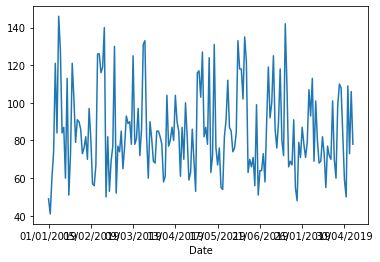

In [156]:
#plotting the no of items on each day
m=df.groupby(df['Date'])['ItemQty'].sum()
m.plot()

In [7]:
df[['ItemPrice', 'ItemQty']].describe()

,ItemPrice,ItemQty
count,12026.000000,12026.000000
mean,10.333839,1.279145
std,5.729900,0.466768
min,2.750000,1.000000
25%,5.000000,1.000000
50%,11.000000,1.000000
75%,16.000000,2.000000
max,19.000000,3.000000


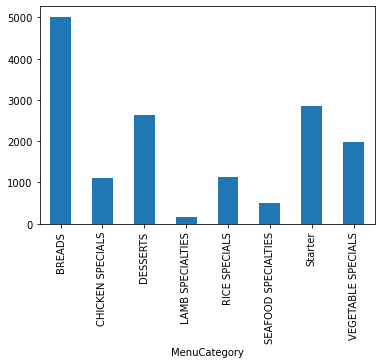

In [8]:

df.groupby('MenuCategory')['ItemQty'].sum().plot.bar()

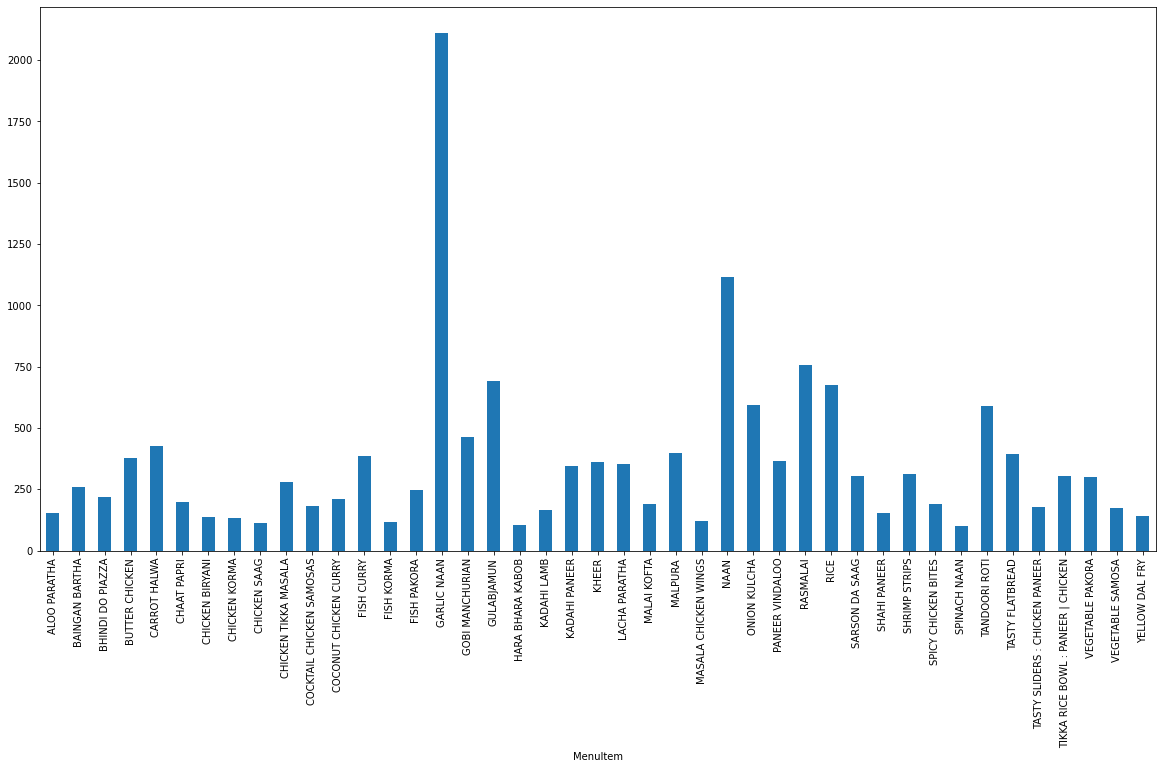

In [158]:
pyplot.figure(figsize=(20,10))
df.groupby(['MenuItem'])['ItemQty'].sum().plot.bar()

# Applying Models  to Predict Item Quantity

In [182]:
#loading the necessary modules for the ML models and preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import scipy.stats as ss
import joblib 

1. Consider Shift ,Day, PartySize, MenuItem, ItemPrice for Predicting Item Quantity<br>
2. Encoding the categorical features of Shift ,Day, PartySize, MenuItem using Label Encoder and One Hot Encoder<br> 
3. scalling the numeric values of ItemPrice feature<br>


In [22]:

    #create object of Label Encoder
    label_encoder=LabelEncoder()
    
    #create the object of One Hot Encoder
    ohe=OneHotEncoder()
    
    #encoder Shift lunch and dinner as 1 and 0 
    encoded_col=label_encoder.fit_transform(df['Shift'])
    
    #applying one hot encoding
    features= ohe.fit_transform(encoded_col.reshape(-1,1)).toarray()
    features.shape

(12026, 2)

In [23]:
#encoding all the categorical variables 
def encoding_categoical_features(column):
    
    #create object of Label Encoder
    label_encoder=LabelEncoder()
    
    #create the object of One Hot Encoder
    ohe=OneHotEncoder()
    
    #encoder Shift lunch and dinner as 0 and 1 
    encoded_col=label_encoder.fit(column)
    encoded_col=encoded_col.transform(column)
    
    return ohe.fit_transform(encoded_col.reshape(-1,1)).toarray()


In [25]:

columns=['Day','PartySize','MenuItem']
for col in columns:
    encoded_col=encoding_categoical_features(df[col])
    features=np.concatenate([features,encoded_col],axis=1)
    


In [27]:
scale=StandardScaler()
scaled_item_price=scale.fit(df[['ItemPrice']])
item_price=scaled_item_price.transform(df[['ItemPrice']])
features = np.concatenate([features, item_price], axis = 1)

In [34]:
#set the labels item Quantity 
labels=np.array(df["ItemQty"])
print(labels)

#spilting the data in training and testing data  
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2)


[1 2 1 ... 2 1 2]


In [40]:
#create and train the  logistic regression model 
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [41]:
#predict the values for test set 
y_score_log=log_model.predict(X_test)

In [42]:
#storing the logistic regression model 
joblib.dump(log_model, 'models/logistic_regression_model.pkl')

['models/logistic_regression_model.pkl']

In [160]:
print("Mean Absolute Error : " +str(mean_absolute_error(y_test,y_score_log)))
print("Mean Square Error : " +str(mean_squared_error(y_test,y_score_log)))

Mean Absolute Error : 0.13923524522028263
Mean Square Error : 0.13923524522028263


In [56]:
# Support Vector Machine Algorithm 
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

SVR()

In [57]:
y_score_svm=svr_regressor.predict(X_test)

In [161]:
#round  off the scores before calculating error 
r_score_svm=[round(p) for p in y_score_svm]

In [175]:
print("Mean Absolute Error : " +str(mean_absolute_error(y_test,r_score_svm)))
print("Mean Square Error : " +str(mean_squared_error(y_test,r_score_svm)))

Mean Absolute Error : 0.0743973399833749
Mean Square Error : 0.0743973399833749


In [63]:
#storing the SVM regression model 
joblib.dump(svr_regressor, 'models/SVM_model.pkl')

['models/SVM_model.pkl']

In [65]:
#neural network implementation 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten



Using TensorFlow backend.


In [66]:
#define the model Neural Network 

nn_model=Sequential()

#the Input Layer

nn_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
nn_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
nn_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
nn_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

# The Output Layer :
nn_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
nn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7424      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 435,201
Trainable params: 435,201
Non-trainable params: 0
_________________________________________________________________


In [67]:

#defining the checkpoint call back
checkpoint_name = 'Weights_new_model-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [68]:
#train the model 
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 7696 samples, validate on 1924 samples
Epoch 1/100
7696/7696 [==============================] - 6s 808us/step - loss: 0.2091 - mean_absolute_error: 0.2091 - accuracy: 0.8488 - val_loss: 0.1631 - val_mean_absolute_error: 0.1631 - val_accuracy: 0.9111

Epoch 00001: val_loss improved from inf to 0.16314, saving model to Weights_new_model-001--0.16314.hdf5
Epoch 2/100
7696/7696 [==============================] - 3s 365us/step - loss: 0.1111 - mean_absolute_error: 0.1111 - accuracy: 0.9305 - val_loss: 0.1119 - val_mean_absolute_error: 0.1119 - val_accuracy: 0.9210

Epoch 00002: val_loss improved from 0.16314 to 0.11188, saving model to Weights_new_model-002--0.11188.hdf5
Epoch 3/100
7696/7696 [==============================] - 3s 365us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - accuracy: 0.9322 - val_loss: 0.1112 - val_mean_absolute_error: 0.1112 - val_accuracy: 0.9200

Epoch 00003: val_loss improved from 0.11188 to 0.11116, saving model to Weights_new_model-003--0.11116.h

7696/7696 [==============================] - 3s 374us/step - loss: 0.0660 - mean_absolute_error: 0.0660 - accuracy: 0.9392 - val_loss: 0.0839 - val_mean_absolute_error: 0.0839 - val_accuracy: 0.9200

Epoch 00060: val_loss did not improve from 0.08170
Epoch 61/100
7696/7696 [==============================] - 3s 386us/step - loss: 0.0667 - mean_absolute_error: 0.0667 - accuracy: 0.9392 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872 - val_accuracy: 0.9200

Epoch 00061: val_loss did not improve from 0.08170
Epoch 62/100
7696/7696 [==============================] - 3s 371us/step - loss: 0.0662 - mean_absolute_error: 0.0662 - accuracy: 0.9396 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881 - val_accuracy: 0.9200

Epoch 00062: val_loss did not improve from 0.08170
Epoch 63/100
7696/7696 [==============================] - 3s 369us/step - loss: 0.0653 - mean_absolute_error: 0.0653 - accuracy: 0.9394 - val_loss: 0.0834 - val_mean_absolute_error: 0.0834 - val_accuracy: 0.9200

Epoch 00

7696/7696 [==============================] - 3s 359us/step - loss: 0.0641 - mean_absolute_error: 0.0641 - accuracy: 0.9394 - val_loss: 0.0820 - val_mean_absolute_error: 0.0820 - val_accuracy: 0.9205

Epoch 00091: val_loss did not improve from 0.08048
Epoch 92/100
7696/7696 [==============================] - 3s 367us/step - loss: 0.0661 - mean_absolute_error: 0.0661 - accuracy: 0.9394 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845 - val_accuracy: 0.9205

Epoch 00092: val_loss did not improve from 0.08048
Epoch 93/100
7696/7696 [==============================] - 3s 362us/step - loss: 0.0671 - mean_absolute_error: 0.0671 - accuracy: 0.9392 - val_loss: 0.0831 - val_mean_absolute_error: 0.0831 - val_accuracy: 0.9205

Epoch 00093: val_loss did not improve from 0.08048
Epoch 94/100
7696/7696 [==============================] - 3s 366us/step - loss: 0.0657 - mean_absolute_error: 0.0657 - accuracy: 0.9388 - val_loss: 0.0839 - val_mean_absolute_error: 0.0839 - val_accuracy: 0.9210

Epoch 00

In [69]:
#predict the value for Test data
predictions_nn = nn_model.predict(X_test)
predictions_nn.shape
predictions_nn

array([[0.9983309],
       [2.0035262],
       [2.0044684],
       ...,
       [0.9983309],
       [2.0046277],
       [2.0046306]], dtype=float32)

In [70]:
#rounding off predicted data
pred_nn=[round(p[0]) for p in predictions_nn]

In [164]:
print("Mean Absolute Error : " +str(mean_absolute_error(y_test,pred_nn)))
print("Mean Square Error : " +str(mean_squared_error(y_test,pred_nn)))

Mean Absolute Error : 0.07772236076475478
Mean Square Error : 0.07772236076475478


In [189]:
def residual_plot(y_test, r_score,title):
     
    resid = np.subtract(y_test, r_score)
    ## now make the residual plots
    ss.probplot(resid.flatten(), plot = plt)
    plt.title(title)
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

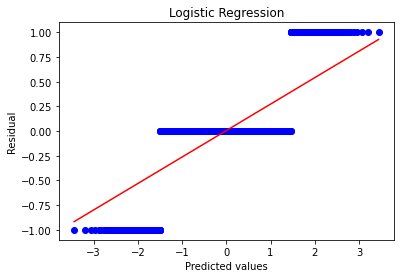

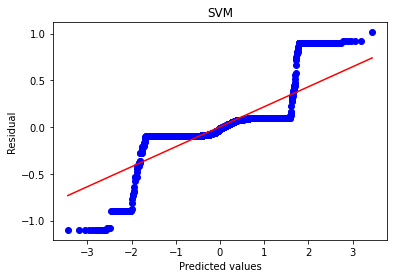

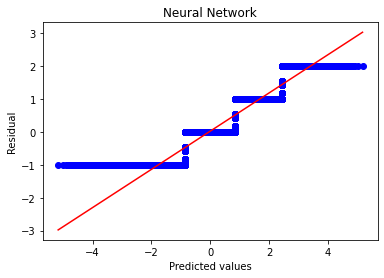

In [192]:
residual_plot(y_test, y_score_log,"Logistic Regression")
residual_plot(y_test, y_score_svm,"SVM")
residual_plot(y_test,predictions_nn,'Neural Network')

In [176]:
data={
    'Models':['SVM','Neural Network','Logistic Reggression'],
    'Mean Absolute Error' :[0.0743973399833749,0.07772236076475478,0.13923524522028263],
    'Mean Square Error':[0.0743973399833749,0.07772236076475478,0.13923524522028263]
}
best_model=pd.DataFrame(data)
best_model

#ba

,Models,Mean Absolute Error,Mean Square Error
0,SVM,0.074397,0.074397
1,Neural Network,0.077722,0.077722
2,Logistic Reggression,0.139235,0.139235


<b>Based on the  Mean absolute error and mean square Error we can conclude that SVM performs better than logistic regression and ANN <b>

# Predicting Top Menu Item and Item Quantity

1. create the dataset from 1-July-2019 to 7-July-2019 <br>
2. preprocess the data for passing to the model for prediction<br>
3. get the Item Quantity 
4. use the Item to Predict  the Top Menu for lunch and Dinner 

In [102]:
#load the data for prediction
dataset_prediction=pd.read_excel('data/prediction_dataset.xlsx')

In [103]:
dataset_prediction.head()


,Date,Shift,Day Type,Day,Time,PartySize,MenuCategory,MenuItem,ItemPrice
0,01/07/2019,Lunch,Weekday,Monday,01:23 PM,2,DESSERTS,GULABJAMUN,6.00
1,01/07/2019,Lunch,Weekday,Monday,01:23 PM,2,BREADS,ALOO PARATHA,5.00
2,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,VEGETABLE SPECIALS,BHINDI DO PIAZZA,16.00
3,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,VEGETABLE SPECIALS,BHINDI DO PIAZZA,16.00
4,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,BREADS,NAAN,2.75


In [104]:
#applying the preprocessing 

    #create object of Label Encoder
    label_encoder=LabelEncoder()
    
    #create the object of One Hot Encoder
    ohe=OneHotEncoder()
    
    #encoder Shift lunch and dinner as 0 and 1 
    encoded_col=label_encoder.fit_transform(dataset_prediction['Shift'])
    
    final_features= ohe.fit_transform(encoded_col.reshape(-1,1)).toarray()
final_features.shape    

(465, 2)

In [105]:
columns_final=['Day','PartySize','MenuItem']

for col in columns_final:
    encoded_col=encoding_categoical_features(dataset_prediction[col])
    print(dataset_prediction[col].unique())
    final_features=np.concatenate([final_features,encoded_col],axis=1)
final_features.shape    

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
[2 4 3 5]
['GULABJAMUN' 'ALOO PARATHA' 'BHINDI DO PIAZZA' 'NAAN' 'GARLIC NAAN'
 'CHICKEN TIKKA MASALA' 'COCKTAIL CHICKEN SAMOSAS' 'CHICKEN KORMA'
 'FISH KORMA' 'CHICKEN BIRYANI' 'RICE' 'RASMALAI' 'TANDOORI ROTI'
 'KADAHI LAMB' 'BUTTER CHICKEN' 'MALAI KOFTA' 'COCONUT CHICKEN CURRY'
 'KADAHI PANEER' 'ONION KULCHA' 'VEGETABLE SAMOSA' 'MALPURA'
 'SARSON DA SAAG' 'FISH PAKORA' 'YELLOW DAL FRY'
 'TIKKA RICE BOWL : PANEER | CHICKEN' 'TASTY FLATBREAD' 'BAINGAN BARTHA'
 'HARA BHARA KABOB' 'CARROT HALWA' 'VEGETABLE PAKORA' 'FISH CURRY'
 'SPICY CHICKEN BITES' 'PANEER VINDALOO' 'SHRIMP STRIPS' 'GOBI MANCHURIAN'
 'CHICKEN SAAG' 'SPINACH NAAN' 'MASALA CHICKEN WINGS' 'KHEER'
 'TASTY SLIDERS : CHICKEN PANEER' 'CHAAT PAPRI' 'LACHA PARATHA'
 'SHAHI PANEER']


(465, 56)

In [106]:
scale=StandardScaler()
scaled_item_price=scale.fit(dataset_prediction[['ItemPrice']])
item_price=scaled_item_price.transform(dataset_prediction[['ItemPrice']])
final_features = np.concatenate([final_features, item_price], axis = 1)
final_features.shape

(465, 57)

In [107]:
#predict the Item Quantity
final_itemQty=svr_regressor.predict(final_features)

In [108]:
final_itemQty

array([0.917922  , 1.06107091, 0.98331999, 0.98331999, 1.99294026,
       1.90543317, 1.99294026, 0.92474657, 0.96459965, 1.1000088 ,
       1.10008497, 1.10019373, 0.94439349, 0.96889843, 1.89942688,
       2.09985936, 1.03027122, 1.04947248, 1.90417097, 1.05311325,
       0.91630026, 0.89982875, 1.09956666, 1.16070364, 1.09955786,
       1.0813296 , 1.09955475, 1.10019506, 1.10019506, 1.10010375,
       1.10019506, 1.10012999, 1.89986433, 1.1001128 , 1.10182511,
       1.93934442, 1.10019506, 1.09953158, 1.05325343, 1.49719277,
       1.89899179, 1.09927592, 1.0894848 , 1.06623138, 1.08568432,
       1.08568432, 1.10157521, 1.09993276, 2.08047236, 1.03113228,
       0.94871073, 1.53144487, 1.09955965, 1.09993276, 1.53144487,
       1.42521028, 2.01137607, 1.09611448, 2.01137607, 0.99256259,
       1.09611448, 0.91306184, 1.09110841, 1.89954518, 0.91722276,
       0.99653552, 1.09990927, 1.06320415, 0.90293193, 0.9115412 ,
       0.93022526, 1.10005159, 2.08047236, 1.90254732, 1.06224

In [110]:
predicted_itemQty=[round(p) for p in final_itemQty]

In [111]:
predicted_itemQty

[1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0

In [112]:
#create the column of Predicted Item Quantity 
dataset_prediction['PredictedItemQty']=predicted_itemQty

In [113]:
dataset_prediction.head()

,Date,Shift,Day Type,Day,Time,PartySize,MenuCategory,MenuItem,ItemPrice,PredictedItemQty
0,01/07/2019,Lunch,Weekday,Monday,01:23 PM,2,DESSERTS,GULABJAMUN,6.00,1.0
1,01/07/2019,Lunch,Weekday,Monday,01:23 PM,2,BREADS,ALOO PARATHA,5.00,1.0
2,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,VEGETABLE SPECIALS,BHINDI DO PIAZZA,16.00,1.0
3,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,VEGETABLE SPECIALS,BHINDI DO PIAZZA,16.00,1.0
4,01/07/2019,Lunch,Weekday,Monday,01:48 PM,4,BREADS,NAAN,2.75,2.0


In [165]:
top_menu_item_list=pd.DataFrame(columns=('Day','MenuItem','cnt','Shift'))

In [166]:
top_menu_item_list

,Day,MenuItem,cnt,Shift


In [168]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for day in days:
    
    data=dataset_prediction.loc[(dataset_prediction['Day']==day) & (dataset_prediction['Shift']=='Lunch')]
    d=data.groupby(['MenuItem'])['PredictedItemQty'].sum()
    d=d.sort_values( ascending=False)
    
    top_menu_item_list.loc[len(top_menu_item_list)+1] = [day,d.index[0],d[0],'Lunch']
    
    
    data=dataset_prediction.loc[(dataset_prediction['Day']==day) & (dataset_prediction['Shift']=='Dinner')]
    d=data.groupby(['MenuItem'])['PredictedItemQty'].sum()
    d=d.sort_values( ascending=False)
    
    top_menu_item_list.loc[len(top_menu_item_list)+1] = [day,d.index[0],d[0],'Dinner']
    
    

In [146]:
top_menu_item_list.to_excel('data/predicted_top_menu.xlsx')

In [169]:
#top menu item for lunch and Dinner  on each day of the week 

top_menu_item_list

,Day,MenuItem,cnt,Shift
1,Monday,NAAN,4.0,Lunch
2,Monday,GULABJAMUN,5.0,Dinner
3,Tuesday,NAAN,6.0,Lunch
4,Tuesday,GARLIC NAAN,6.0,Dinner
5,Wednesday,GARLIC NAAN,8.0,Lunch
6,Wednesday,NAAN,3.0,Dinner
7,Thursday,NAAN,4.0,Lunch
8,Thursday,GARLIC NAAN,4.0,Dinner
9,Friday,FISH CURRY,4.0,Lunch
10,Friday,NAAN,6.0,Dinner


In [170]:
#weekly top MENU Items and there quantities for Lunch and Dinner
pred = dataset_prediction.pivot_table(values='PredictedItemQty', index='MenuItem', columns='Shift',aggfunc=sum)
pred=pred.sort_values(by=['Dinner','Lunch'], ascending=False)

In [171]:
pred

Shift,Dinner,Lunch
MenuItem,,
GARLIC NAAN,41.0,31.0
NAAN,26.0,21.0
TASTY FLATBREAD,15.0,1.0
BUTTER CHICKEN,13.0,14.0
RASMALAI,13.0,7.0
RICE,12.0,14.0
GULABJAMUN,12.0,11.0
ONION KULCHA,11.0,11.0
CARROT HALWA,10.0,10.0
